In [2]:
# Importing libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Getting Apple Stock Data for year 2022
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"
apple_stock = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Creating a new column of the previous adj close
lst_of_close = [0] + list(apple_stock['Adj Close'][0:-1]) 
apple_stock['Previous Adj Close'] = lst_of_close

# Dropping first row since previous  is set to 0 -- inaccurate
apple_stock = apple_stock.iloc[1:, :]

# Setting our X as previous day's adj close & y as that day's adj close
X = apple_stock[['Previous Adj Close']] 
y = apple_stock['Adj Close']

# Splitting the data (80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model and fitting it to our X and y
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions using our Linear Regression model on the X values from the test split
y_pred = model.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


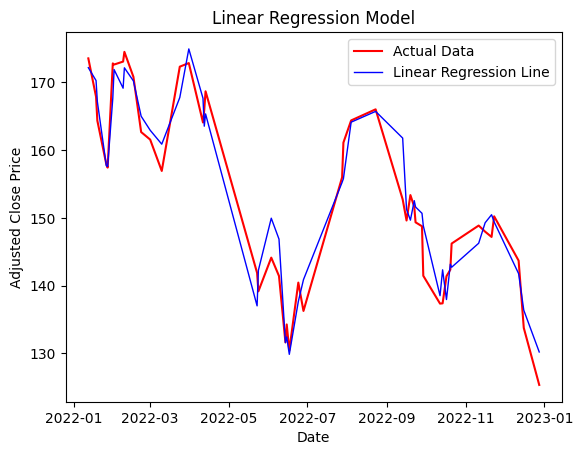

Mean Squared Error: 11.357412138981157


In [10]:
# Sorting the X and y indeces for the sake of plotting
X_test_sorted = X_test.sort_index()
y_pred_sorted = model.predict(X_test_sorted)

# Creating a scatter plot with the actual data points
plt.plot(X_test_sorted.index, y_test[X_test_sorted.index], color='red', label='Actual Data')
#plt.scatter(X_test_sorted.index, y_test[X_test_sorted.index], color='black', label='Actual Data')
# Plotting the Linear Regression line to visualize predictions
plt.plot(X_test_sorted.index, y_pred_sorted, color='blue', linewidth=1, label='Linear Regression Line')

# Styling for the plot 
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

# Calculating the MSE to quantify the accuracy of this model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f86dace4-c215-40df-9ea2-a63cc39cfa4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>